# DCS 630 Predictive Analytics 
## Bellevue University
## 4.2 Assignment: Clustering Exercise
## Author: Gyan Kannur
## Date: 09/25/2025

## Assignment Instructions:
You will be using the dataset als_data.csv to apply clustering methods for this assignment. This data gives anonymized data on ALS patients. With this data, complete the following steps:

<ol>
    <li> Remove any data that is not relevant to the patient’s ALS condition.
    <li> Apply a standard scalar to the data.
    <li> Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
    <li> Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.
    <li> Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
    <li> Fit a PCA transformation with two features to the scaled data.
    <li> Make a scatterplot the PCA transformed data coloring each point by its cluster value.
    <li> Summarize your results and make a conclusion.
<ol>

Link to PRO-ACT Dataset: <br>
[Dataset als_Data.csv Source](https://ncri1.partners.org/ProACT/Document/DisplayLatest/2)

In [1]:
'''
Import the necessary libraries to complete Exercise 3.2.
'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.9.1
sklearn: 1.5.2


### Data Understanding - Dataset Overview

In [3]:
'''
Import the dataset.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
'''
df = pd.read_csv('./assignment-datasets/als_data.csv')

In [4]:
'''
Use head() function to display the first 10 rows of data of df.
'''
df.head(10)

ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   
5   6        36         51.0            47.0         46.0       0.009058   
6   7        55         46.0            44.0         40.0       0.010850   
7   8        55         45.0            42.0         38.0       0.018519   
8   9        37         48.0            46.0         41.0       0.012681   
9  11        72         44.0            42.0         38.0       0.010714   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   
2     -0.914787                24                 14.0                10  ...   
3     -0.598361                30                 29.0                24  ...   
4     -0.444039                32                 27.5                20  ...   
5     -0.118353                37                 34.5                27  ...   
6     -1.225580                34                 24.0                10  ...   
7     -0.760417                30                 27.5                20  ...   
8     -1.010148                35                 28.5                24  ...   
9     -0.107861                28                 25.5                23  ...   

   Sodium_min  Sodium_range  SubjectID  trunk_max  trunk_median  trunk_min  \
0       143.0      0.017422        533          8           7.0          7   
1       136.0      0.010453        649          8           7.0          5   
2       140.0      0.008929       1234          5           0.0          0   
3       138.0      0.012469       2492          5           5.0          3   
4       138.0      0.008292       2956          6           4.0          1   
5       137.0      0.014493       3085          8           8.0          7   
6       136.0      0.016275       3551          7           5.0          2   
7       139.0      0.015873       3971          5           3.0          2   
8       138.0      0.014493       4390          6           3.0          2   
9       132.0      0.026643       4772          3           3.0          1   

   trunk_range  Urine.Ph_max  Urine.Ph_median  Urine.Ph_min  
0     0.002646           6.0              6.0           6.0  
1     0.005386           7.0              5.0           5.0  
2     0.008929           6.0              5.0           5.0  
3     0.004988           7.0              6.0           5.0  
4     0.008489           6.0              5.0           5.0  
5     0.001812           8.0              6.0           5.0  
6     0.009042           9.0              5.0           5.0  
7     0.007937           6.0              6.0           6.0  
8     0.007246           7.0              6.0           5.0  
9     0.003571           7.0              6.0           5.0  

[10 rows x 101 columns]

In [5]:
'''
Understand the shape of the dataset.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))

There are 2223 rows and 101 columns in this dataset.


In [6]:
'''
Display the total size of this dataset.
'''
print('This dataset contains {} records.'.format(df.size))

This dataset contains 224523 records.


In [7]:
'''
Find the type of data within each column initially.
'''
df.dtypes

ID                   int64
Age_mean             int64
Albumin_max        float64
Albumin_median     float64
Albumin_min        float64
                    ...   
trunk_min            int64
trunk_range        float64
Urine.Ph_max       float64
Urine.Ph_median    float64
Urine.Ph_min       float64
Length: 101, dtype: object

In [8]:
'''
Understand if there are any missing values in the dataset.
'''
df.isna().sum().sort_values(ascending = False)

ID                     0
leg_max                0
Platelets_max          0
onset_site_mean        0
onset_delta_mean       0
                      ..
bp_systolic_max        0
bp_diastolic_range     0
bp_diastolic_min       0
bp_diastolic_median    0
Urine.Ph_min           0
Length: 101, dtype: int64

In [9]:
'''
Understand how many missing values are in the dataset initially.
'''
df.isna().sum().sum()

0

In [10]:
'''
Understand how many unique values are within each feature.
'''
df.nunique()

ID                 2223
Age_mean             61
Albumin_max         104
Albumin_median      107
Albumin_min         106
                   ... 
trunk_min             9
trunk_range         791
Urine.Ph_max         16
Urine.Ph_median      15
Urine.Ph_min          8
Length: 101, dtype: int64

In [11]:
'''
Summarize the findings above with info().
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


### Observations for Dataset Summary: 
<ul>
    <li> There are 101 features and 2223 records to start in the dataset.
    <li> There does not appear to be any missing values in the dataset.
<ul>

### Data Understanding - Continued

In [12]:
'''
Separate the columns into numeric and categorical to understand what is present.
'''
df_numeric = df.select_dtypes(include = 'number')
df_categorical = df.select_dtypes(include = 'object')

In [13]:
'''
Understand the number of numeric features.
'''
df_numeric.shape[1]

101

In [14]:
'''
Understand the number of categorical features.
'''
df_categorical.shape[1]

0

In [15]:
'''
Understand all of the features named in the dataset.
'''
columns_df = df.columns
columns_df

Index(['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min',
       'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max',
       'ALSFRS_Total_median', 'ALSFRS_Total_min',
       ...
       'Sodium_min', 'Sodium_range', 'SubjectID', 'trunk_max', 'trunk_median',
       'trunk_min', 'trunk_range', 'Urine.Ph_max', 'Urine.Ph_median',
       'Urine.Ph_min'],
      dtype='object', length=101)

All of the features included in the dataset are numeric. Some of the features such as gender are currently labeled as numeric, however this will be addressed when removing irrelevant features during the analysis. 

Text(0.5, 1.0, 'Correlation Heatmap of ALS Dataset')

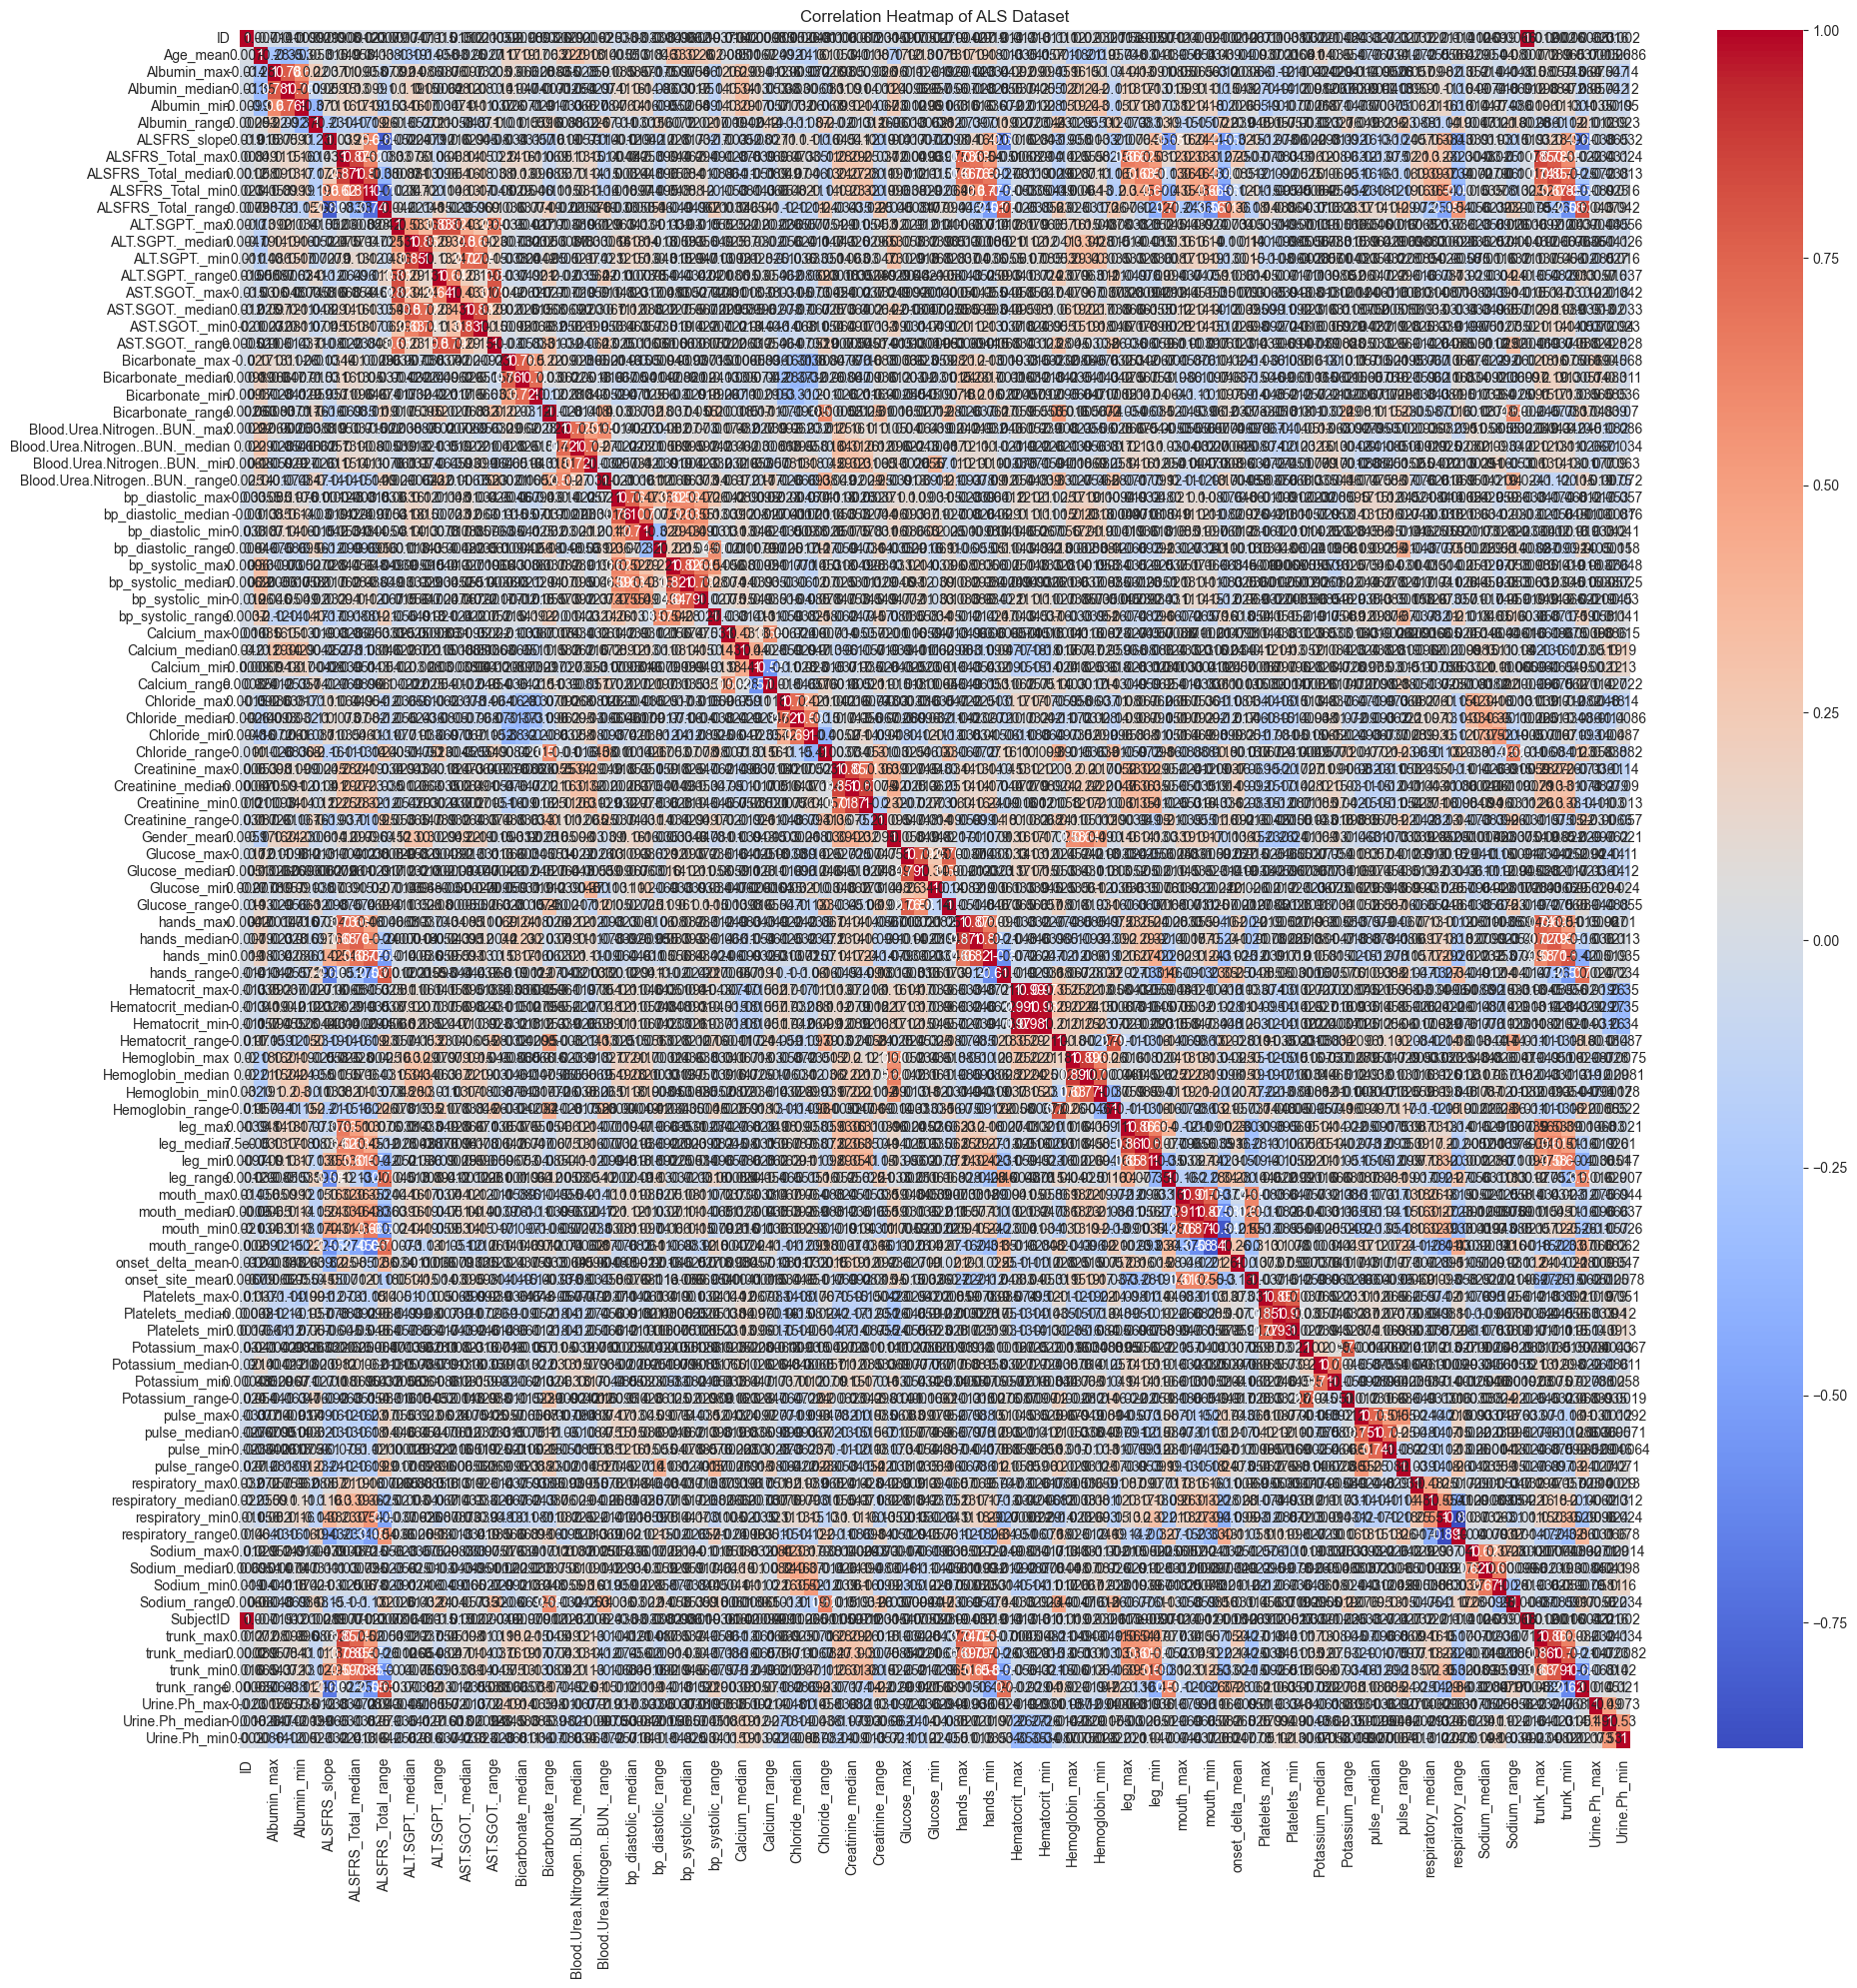

In [16]:
'''
Display a correlation heatmap. Utilize sns.heatmap() to generate the figure. The Point-Serial Correlation Heatmap will not be
used in this case since all of the features are currently numeric. 
'''
# Calculate the correlation coefficient with corr().
correlation_number = df.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(20,20), tight_layout = True)
sns.heatmap(correlation_number, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of ALS Dataset')

There are so many features in the dataset that it is currently difficult to understand the heatmap. As a result, the top 20 features for positive and negative correlation will be identified with the feature ALSFRS_Total_median.

In [17]:
'''
Understand which features are highly positive correlated with ALSFRS_Total_median score.
'''
df.corr().unstack()['ALSFRS_Total_median'].sort_values(ascending = False).drop_duplicates()[0:20]

ALSFRS_Total_median    1.000000
ALSFRS_Total_max       0.874428
trunk_median           0.850799
ALSFRS_Total_min       0.814057
hands_median           0.763911
trunk_max              0.741941
trunk_min              0.729634
hands_min              0.682683
hands_max              0.661319
leg_median             0.629515
leg_min                0.607473
leg_max                0.505627
mouth_min              0.481710
mouth_median           0.461300
respiratory_median     0.387297
respiratory_min        0.366022
mouth_max              0.355121
Creatinine_min         0.277597
Creatinine_median      0.265139
ALSFRS_slope           0.247250
dtype: float64

In [18]:
'''
Understand which features are highly negatively correlated with ALSFRS_Total_median score.
'''
df.corr().unstack()['ALSFRS_Total_median'].sort_values(ascending = True).drop_duplicates()[0:20]

mouth_range                       -0.451429
ALSFRS_Total_range                -0.375725
respiratory_range                 -0.340069
hands_range                       -0.269736
trunk_range                       -0.252393
Albumin_range                     -0.166473
Hematocrit_range                  -0.163784
Hemoglobin_range                  -0.163736
pulse_max                         -0.163606
pulse_median                      -0.156701
pulse_range                       -0.155642
Blood.Urea.Nitrogen..BUN._range   -0.147537
Chloride_range                    -0.128226
leg_range                         -0.125283
Calcium_median                    -0.108363
Creatinine_range                  -0.108329
Sodium_range                      -0.104691
pulse_min                         -0.100762
Platelets_max                     -0.100351
ALT.SGPT._range                   -0.095818
dtype: float64

### 1) Remove any data that is not relevant to the patient’s ALS condition.

The ID, Subject ID's, and Gender features will be removed from the data. All other features will be retained in the analysis. Based on the correlation with ALSFRS score in the previous section, some of features highly correlated with ALSSFRS score may serve as reduntant with the Min, Max, Median, and Range. These will still be included in the analysis moving forward. 

In [19]:
'''
Create a list of features to remove from the dataframe based on the mean or median values for the features.
'''
drop_features = ['ID', 'SubjectID', 'Gender_mean']

df.drop(drop_features, axis = 1, inplace = True)

In [20]:
'''
Understand the shape of the revised dataset.
'''
print('There are {} rows and {} columns in the revised dataset.'.format(df.shape[0], df.shape[1]))

There are 2223 rows and 98 columns in the revised dataset.


These 98 features will be considered for the remainder of the analysis. 

In [21]:
'''
Show the revised dataframe with the columns removed.
'''
df.head(10)

Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0        65         57.0            40.5         38.0       0.066202   
1        48         45.0            41.0         39.0       0.010453   
2        38         50.0            47.0         45.0       0.008929   
3        63         47.0            44.0         41.0       0.012111   
4        63         47.0            45.5         42.0       0.008292   
5        36         51.0            47.0         46.0       0.009058   
6        55         46.0            44.0         40.0       0.010850   
7        55         45.0            42.0         38.0       0.018519   
8        37         48.0            46.0         41.0       0.012681   
9        72         44.0            42.0         38.0       0.010714   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.965608                30                 28.0                22   
1     -0.921717                37                 33.0                21   
2     -0.914787                24                 14.0                10   
3     -0.598361                30                 29.0                24   
4     -0.444039                32                 27.5                20   
5     -0.118353                37                 34.5                27   
6     -1.225580                34                 24.0                10   
7     -0.760417                30                 27.5                20   
8     -1.010148                35                 28.5                24   
9     -0.107861                28                 25.5                23   

   ALSFRS_Total_range  ...  Sodium_median  Sodium_min  Sodium_range  \
0            0.021164  ...          145.5       143.0      0.017422   
1            0.028725  ...          138.0       136.0      0.010453   
2            0.025000  ...          143.0       140.0      0.008929   
3            0.014963  ...          139.0       138.0      0.012469   
4            0.020374  ...          140.0       138.0      0.008292   
5            0.018116  ...          141.0       137.0      0.014493   
6            0.043400  ...          141.5       136.0      0.016275   
7            0.026455  ...          144.0       139.0      0.015873   
8            0.019928  ...          142.0       138.0      0.014493   
9            0.008929  ...          137.0       132.0      0.026643   

   trunk_max  trunk_median  trunk_min  trunk_range  Urine.Ph_max  \
0          8           7.0          7     0.002646           6.0   
1          8           7.0          5     0.005386           7.0   
2          5           0.0          0     0.008929           6.0   
3          5           5.0          3     0.004988           7.0   
4          6           4.0          1     0.008489           6.0   
5          8           8.0          7     0.001812           8.0   
6          7           5.0          2     0.009042           9.0   
7          5           3.0          2     0.007937           6.0   
8          6           3.0          2     0.007246           7.0   
9          3           3.0          1     0.003571           7.0   

   Urine.Ph_median  Urine.Ph_min  
0              6.0           6.0  
1              5.0           5.0  
2              5.0           5.0  
3              6.0           5.0  
4              5.0           5.0  
5              6.0           5.0  
6              5.0           5.0  
7              6.0           6.0  
8              6.0           5.0  
9              6.0           5.0  

[10 rows x 98 columns]

### 2) Apply a standard scalar to the data.

In [22]:
'''
Standardize the data using StandardScaler(). Store the standardized data as an array to input into the KMeans Model once ready.
'''
sc = StandardScaler()
X = sc.fit_transform(df)

### 3)  Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [23]:
'''
Generate a silhouette score for a specified number of clusters.
'''
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,21)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

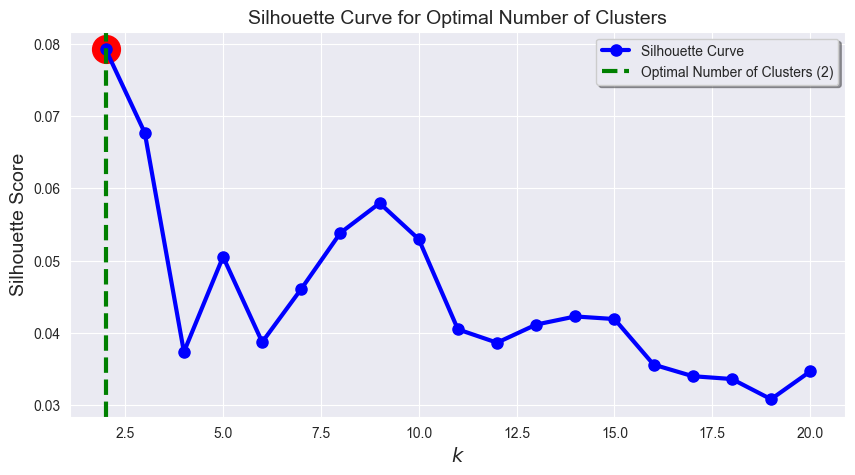

In [24]:
'''
Plot the Silhouette Score vs. Number of Clusters.
'''
plt.rcParams["figure.figsize"] = 10, 5
plt.plot(range(2, 21),  silhouette_scores, "bo-", linewidth = 3, 
        markersize = 8, label = 'Silhouette Curve')
plt.xlabel("$k$", fontsize = 14, family = 'Arial')
plt.ylabel("Silhouette Score", fontsize = 14, family = 'Arial')
plt.title('Silhouette Curve for Optimal Number of Clusters', family = 'Arial', fontsize = 14)

k = np.argmax(silhouette_scores) + 2

plt.axvline(x=k, linestyle='--', c = 'green', linewidth = 3, label = 'Optimal Number of Clusters ({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], c= 'red', s=400)

plt.legend(shadow = True)
plt.show()

The optimial number of clusters appears to be k=2. This will be validated with the elbow method next.

In [25]:
'''
Compute the within cluster sum of squares (wscc) for 20 different numbers of clusters. This will be helpful for plotting
the elbow method in the next cell.
'''
wscc = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wscc.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

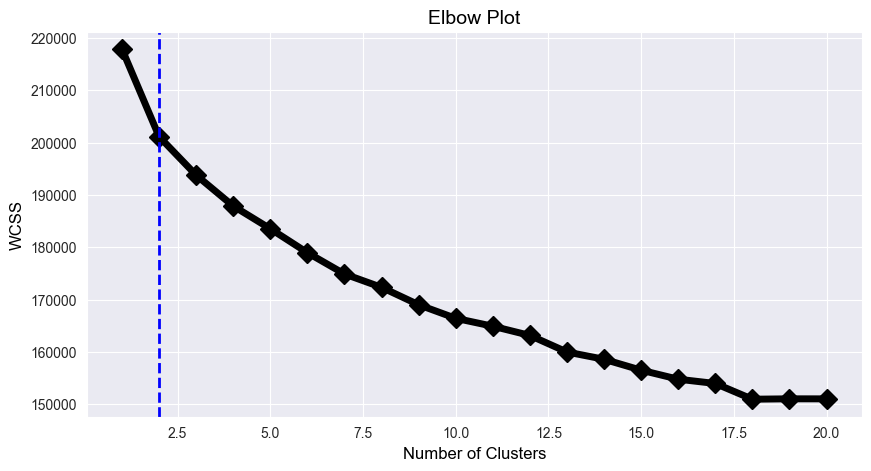

In [26]:
'''
Plot the elbow method for WSCC. This will help confirm the findings from the Silhouette Score Plot.
'''
plt.plot(range(1,21), wscc, linewidth = 5, color = 'black', marker = 'D', markersize = 10)
plt.title('Elbow Plot', family = 'Arial', fontsize = 14, color = 'black')
plt.xlabel('Number of Clusters', family = 'Arial', fontsize = 12, color = 'black')
plt.ylabel('WCSS', family = 'Arial', fontsize = 12, color = 'black')
number_of_clusters = 2

plt.axvline(x=number_of_clusters, linewidth = 2, color = 'blue', linestyle = '--')
plt.show

The Elbow plot also shows an optimal number of clusters at k = 2.

### 4) Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

Based on the plot(s) created in section 3, the optimal number of clusters for K-means is 2. This was validated with the Silhouette Algorithm and the Elbow Plot. The highest silhouette score was generated with 2 clusters and the largest decline in slope for WCSS occured after 2 clusters. 

### 5) Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [27]:
'''
Create the model with the optimal number of clusters.
'''
kmeans = KMeans(n_clusters=2)

In [28]:
'''
Fit the K-Means model to the data.
'''
kmeans.fit(X)

KMeans(n_clusters=2)

In [29]:
'''
Print the shape of the cluster labels to ensure it matches the shape of the dataset.
'''
kmeans.labels_.shape

(2223,)

In [30]:
'''
Print the clusters the model has assigned to each observation.
'''
print("The clusters are: ", kmeans.labels_)

The clusters are:  [0 0 1 ... 0 0 1]


In [31]:
'''
Print the WCSS.
'''
print("The WCSS is: ", kmeans.inertia_)

The WCSS is:  201159.8215578361


In [32]:
'''
Predictions for the new data.
'''
predictions = kmeans.predict(X)

In [33]:
'''
Calculate the counts for the different clusters.
Create a dataframe and display the results.
'''
unique, counts = np.unique(predictions, return_counts= True)
counts = counts.reshape(1,2)
countsldf = pd.DataFrame(counts, columns = ['Cluster 0', 'Cluster 1'])
countsldf

Cluster 0  Cluster 1
0       1109       1114

### 6) Fit a PCA transformation with two features to the scaled data.

In [34]:
'''
Define the variables for the data, response, and response cluster names.
'''
X = X
y_num = predictions
target_names = ['Cluster 0', 'Cluster 1']

In [35]:
'''
Fit a PCA transformation with two features to the scaled data.
'''
pca = PCA(n_components = 2, random_state = 42)
X_new = pca.fit(X).transform(X)

In [36]:
'''
Print the percentage of variance explained for each component.
'''
print('Explained variance ratio for two components: %s'% str(pca.explained_variance_ratio_))

Explained variance ratio for two components: [0.11409479 0.06314093]


### 7) Make a scatterplot of the PCA transformed data coloring each point by its cluster value.

<Figure size 1000x500 with 0 Axes>

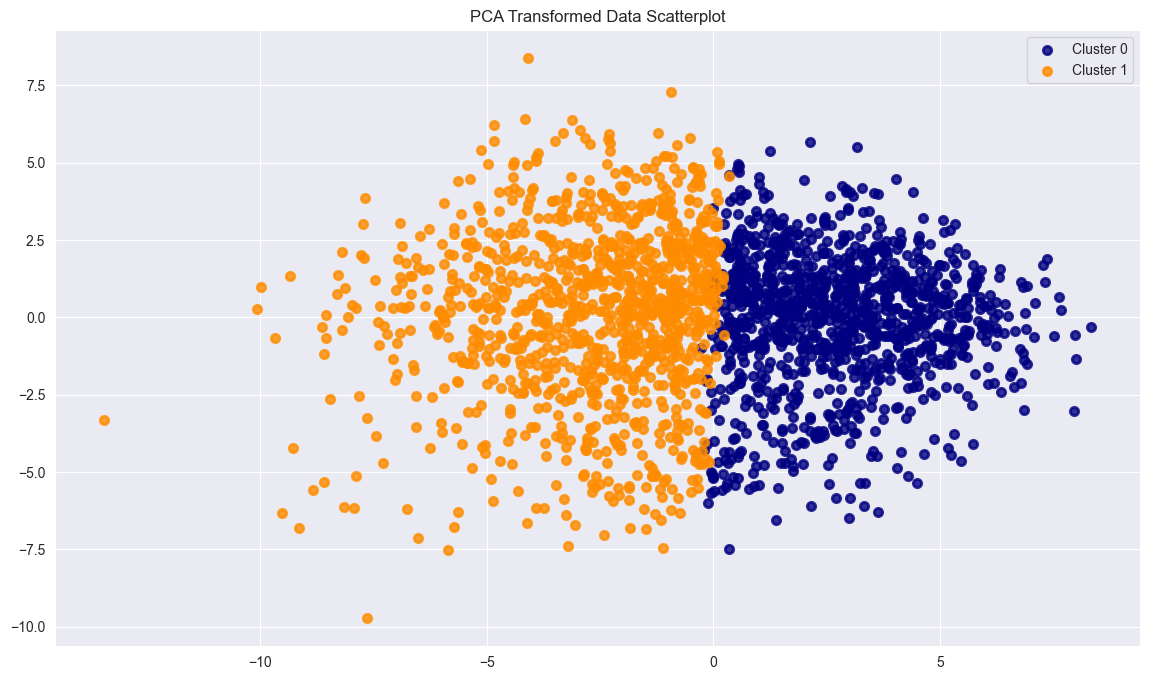

In [37]:
'''
Create a scatterplot of the PCA transformed data coloring each point by its cluster value.
'''
plt.figure()
plt.figure(figsize = (14,8))
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_new[y_num == i, 0], X_new[y_num == i, 1], color = color, alpha = .8, lw = lw, label=target_name)

plt.legend(loc = 'best', shadow=False, scatterpoints = 1)
plt.title('PCA Transformed Data Scatterplot')
plt.show()

### 8) Summarize your results and make a conclusion. 

#### Summary of Results and Conclusion:<br>
This assignment involved the ALS Data provided from PRO-ACT. The background for the data file was outlined via the link in the initial section. Majority of the data was retained throughout the analysis. Only the ID, SubjectID, and Gender columns were removed as specified in the first assignment step. The K-Means clustering algorithm is sensitive to the scale of the input data. As a result, a standard scalar was utilized on the data prior to the evaluation of the optimal number of K-mean clusters. Based on the Silhouette Score and Elbow Plot, the optimum number of K-mean clusters was found to be 2. A K-means model was fit to the data with 2 clusters. The count between the two clusters was found to be fairly similar with 1118 in Cluster 0 and 1105 in Cluster 1. The inertia within cluster sum of squares (WCSS) value was calculated to be 201158. After PCA was fit to the scaled data with two features, the first two features had a calculated variance of 11.4% and 6.3%, respectively. Lastly, the final plot of the PCA Transformed data shows the two clusters identified within this dataset. It is recommended to obtain the opinion of some Subject Matter Experts (SME'S) for ALS to help further the progress for this analysis.    
